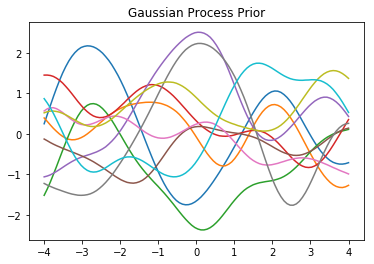

In [18]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
def kernel(p, q):
    kernelParameter = 1
    sqdist = np.sum(p**2,1).reshape(-1,1) + np.sum(q**2,1) - 2*np.dot(p, q.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

n = 100
Xtest = np.linspace(-4, 4, n).reshape(-1,1)
Ktest = kernel(Xtest, Xtest)

#1. Prior functions 
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n))
priors = np.dot(L, np.random.normal(size=(n,10)))
plt.title('Gaussian Process Prior')
plt.plot(Xtest, priors)

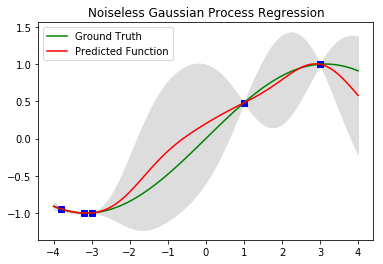

In [19]:
#2. Regression
Xtrain = np.array([-3.8, -3.2, -3, 1, 3]).reshape(5,1)
ytrain = np.array([-0.9463, -0.9996, -0.9975, 0.4794, 0.9975]).reshape(5,1)
GT = np.sin(0.5 * Xtest)

# Applying the kernel function to training points
Ktrain = kernel(Xtrain, Xtrain)
L = np.linalg.cholesky(Ktrain + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
Ktraintest = kernel(Xtrain, Xtest)
Lk = np.linalg.solve(L, Ktraintest)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation
s2 = np.diag(Ktest) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

plt.plot(Xtrain, ytrain, 'bs')
plt.gca().fill_between(Xtest.flat, mu-stdv, mu+stdv, color="#dddddd")
plt.plot(Xtest, GT, 'g-', label = 'Ground Truth')
plt.plot(Xtest, mu, 'r-', label = 'Predicted Function')
plt.title('Noiseless Gaussian Process Regression')
legend  = plt.legend(loc='upper left')
plt.show()

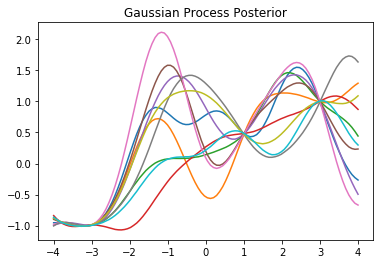

In [21]:
#3. Posterior functions
L = np.linalg.cholesky(Ktest + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
plt.title('Gaussian Process Posterior')
plt.plot(Xtest, post)